<a href="https://colab.research.google.com/github/khushimittal0108/Machine-Learning/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
df= pd.DataFrame(wine['data'],columns=wine['feature_names'])

In [7]:
df['Target']=wine['target']

In [8]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


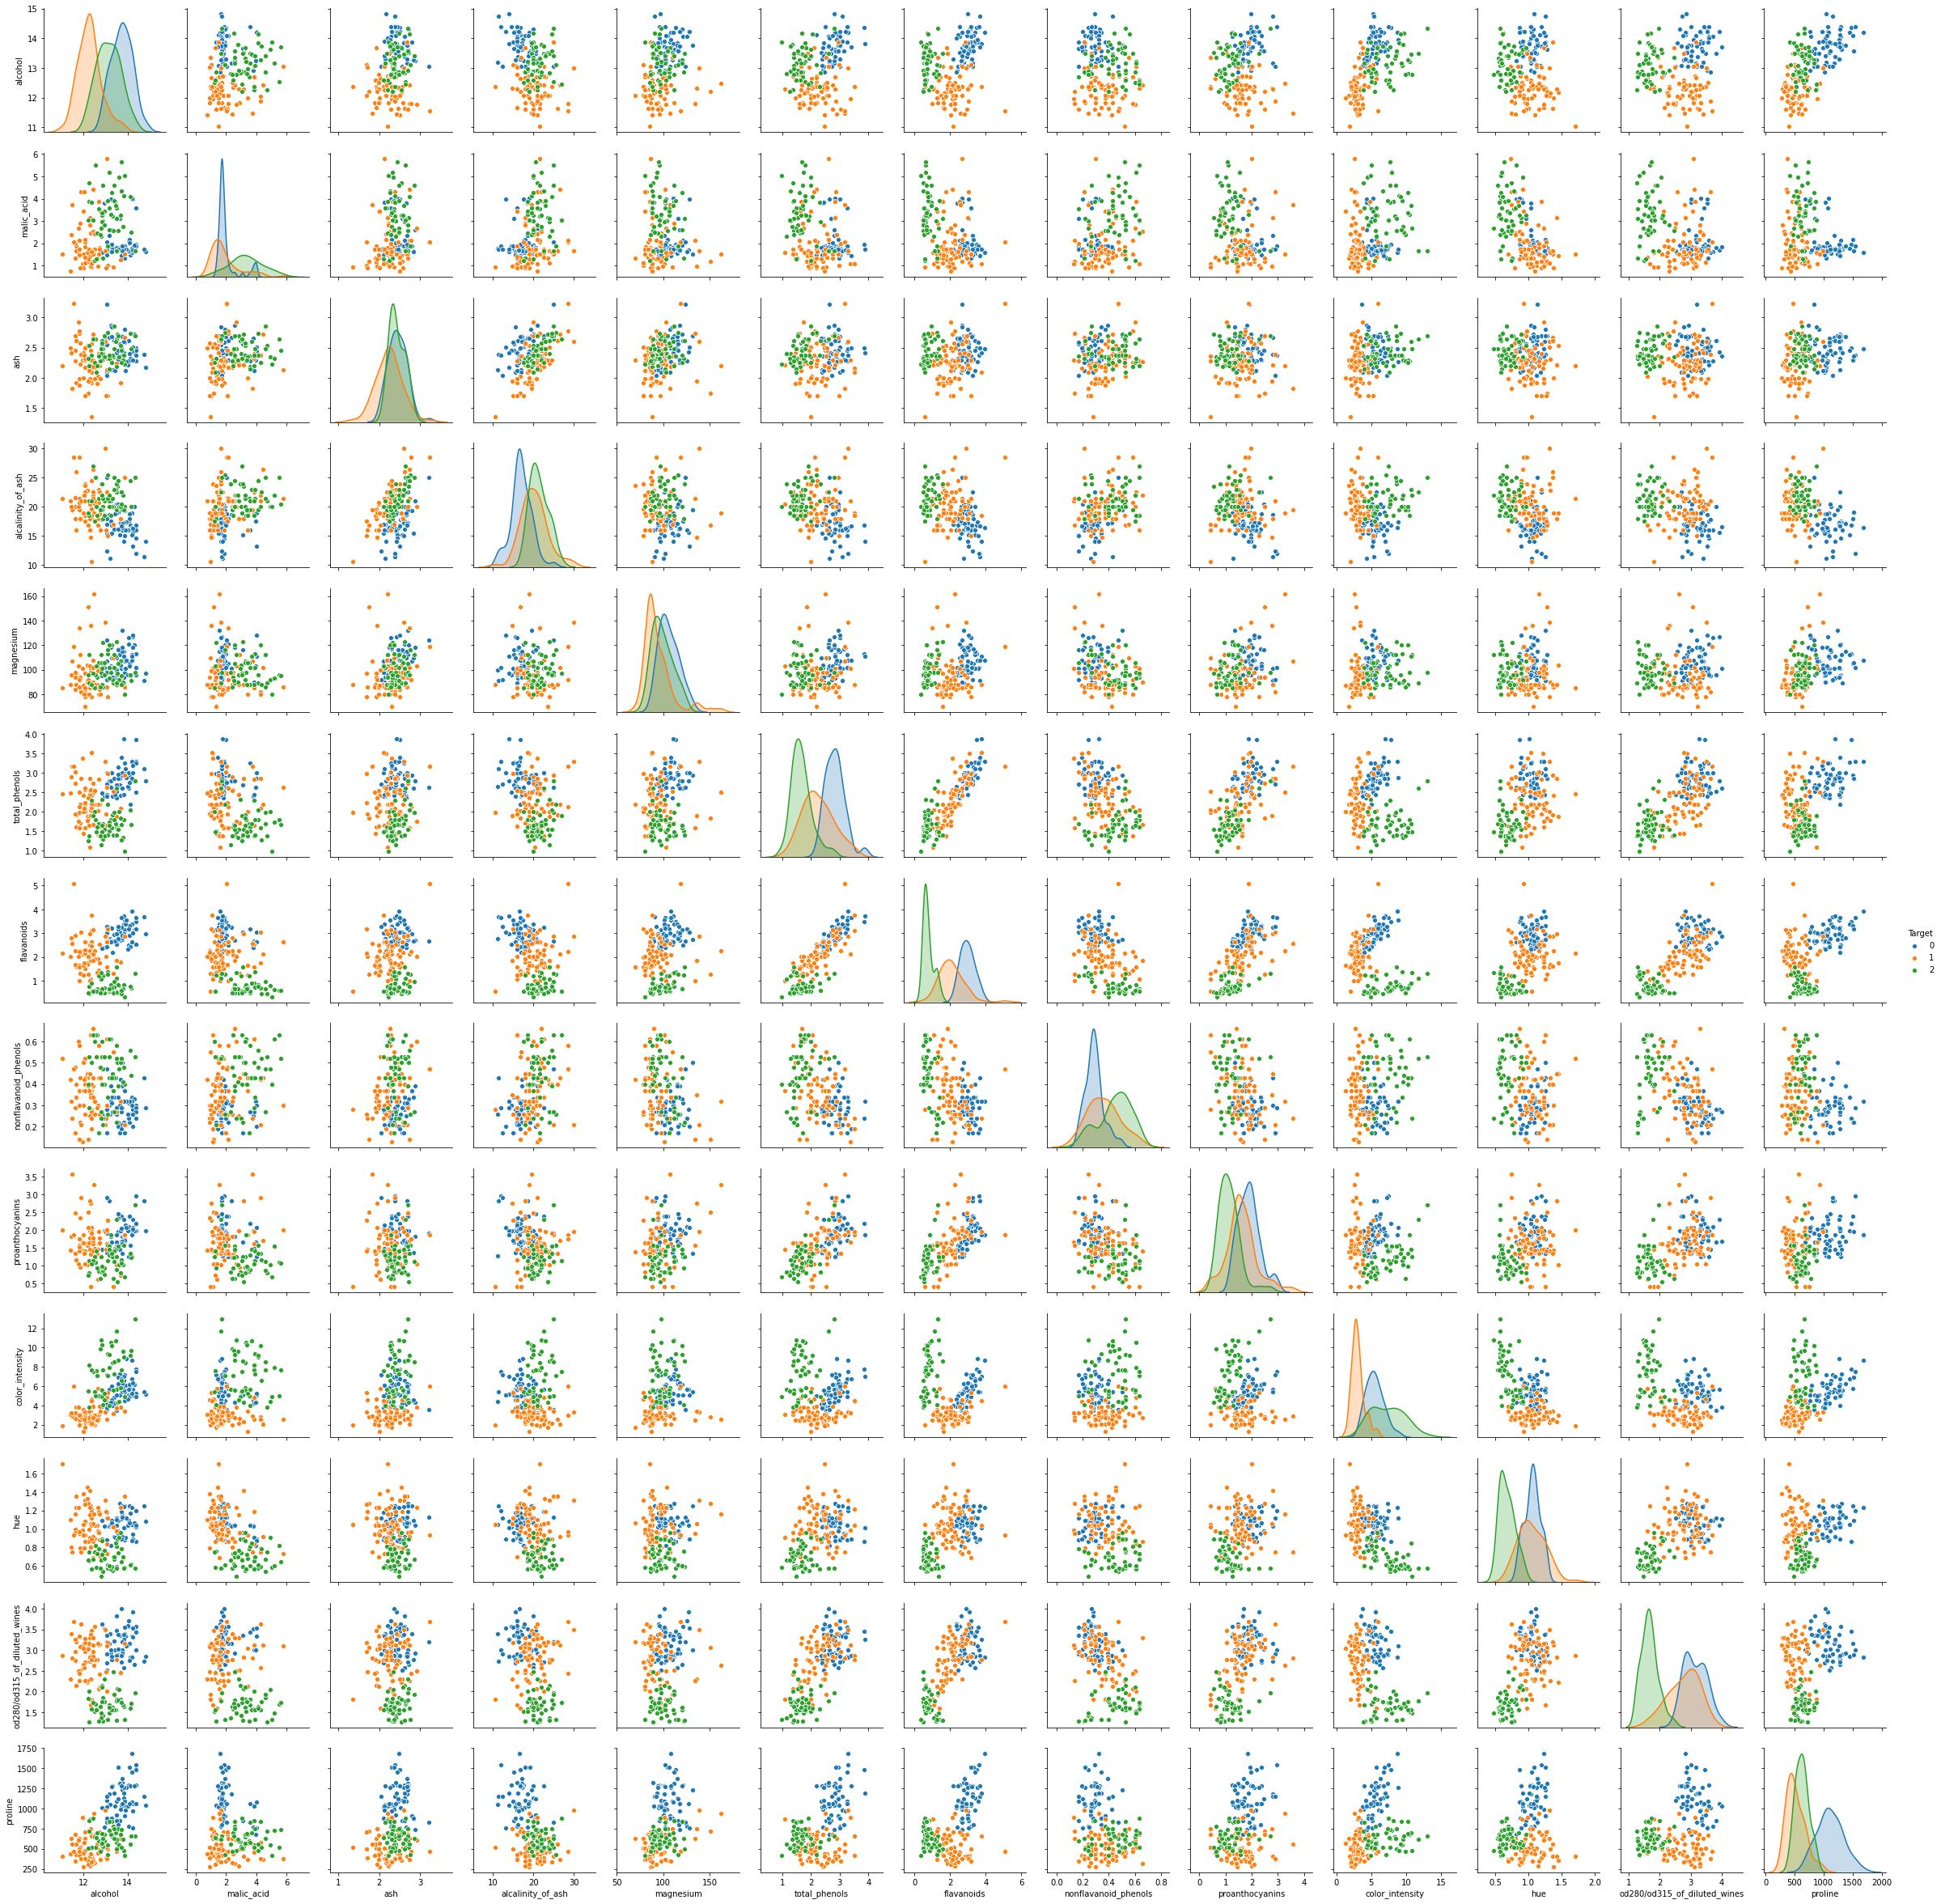

In [31]:
sns.pairplot(df,hue='Target')

In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans=KMeans(n_clusters=3)

In [34]:
kmeans.fit(df.drop('Target',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.cluster_centers_

array([[1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(df['Target'],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87        59
           1       0.32      0.28      0.30        71
           2       0.28      0.40      0.32        48

    accuracy                           0.48       178
   macro avg       0.53      0.49      0.50       178
weighted avg       0.53      0.48      0.50       178



In [38]:
confusion_matrix(df['Target'],kmeans.labels_)

array([[46, 13,  0],
       [ 1, 20, 50],
       [ 0, 29, 19]])

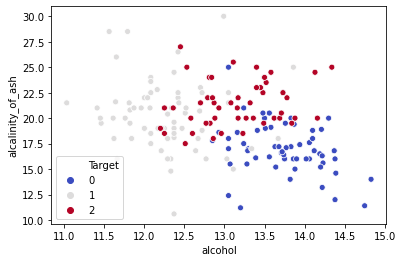

In [41]:
sns.scatterplot('alcohol','alcalinity_of_ash',data = df,hue ='Target',palette='coolwarm')

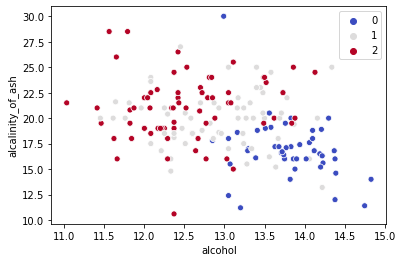

In [42]:
sns.scatterplot('alcohol','alcalinity_of_ash',data = df,hue =kmeans.labels_,palette='coolwarm')